# Sale Analyst in an E-com business

## Questions:
1. What was the best month for sales? How much? Why?
2. What city has the best sales? How much? Why?
3. What time should we display ads to maximize the likelihood of customer's buying product?
4. What products are most often sold together?
5. What product sold the most? Why do you think it sold the most?

**Data attributes:**
- Order ID
- Product
- Quantity Ordered
- Price Each
- Order Date
- Purchase Address

## TOC:
* [1. Set up environment and load data](#h3-1)
* [2. Clean and preprocess data](#h3-2)
    - [2.1. Merge files](#h3-2.1)
    - [2.2. Add 'Month' column](#h3-2.2)
    - [2.3. Get rid of 'NaN' value](#h3-2.3)
* [3. Report & conduct analysis](#h3-3)
    - [3.1. What was the best month for sales? And assumptions.](#h3-3.1)
    - [3.2. What city has the best sales? And assumptions.](#h3-3.2)
    - [3.3. What time should we display ads to maximize the likelihood of customer's buying product?](#h3-3.3)
    - [3.4. What products are most often sold together?](#h3-3.4)
    - [3.5. What product sold the most? And assumptions.](#h3-3.5)

## EDA structure
1. Set up environment and load data
2. Clean and preprocess data
3. Report & conduct analysis

### 1. Set up environment and load data <a class="anchor" id="h3-1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv(".\data\sales2019_1.csv")
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


### 2. Clean and preprocess data <a class="anchor" id="h3-2"></a>

#### 2.1. Merge files <a class="anchor" id="h3-2.1"></a>

In [3]:
base = os.getcwd()
df_list = []
len_df = []
for file in os.listdir(".\data"):
    if file.endswith('.csv') & file.startswith('sales2019'):
        filepath = os.path.join(os.getcwd(), "data", file)
        dfi = pd.read_csv(filepath)
        df_list.append(dfi)
        len_df.append(len(dfi))
df = pd.concat(df_list, ignore_index=True)

In [4]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Overview column Quantity Ordered in dataframe

In [5]:
df['Quantity Ordered'].value_counts().to_frame()

,Quantity Ordered
1,168552
2,13324
3,2920
4,806
Quantity Ordered,355
5,236
6,80
7,24
8,5
9,3


We notice 'Quantity Ordered' column has value of 'Quantity Ordered' string. So our data maybe contain header when concatnate each day data (355 values).

Confirming our assumption. It's seem to be true!

In [6]:
df[(df['Order ID']=='Order ID') & (df['Product']=='Product')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Remove these header rows

In [7]:
df.drop(df[df['Order ID']=='Order ID'].index, inplace=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Save concatnated dataframe to csv file

In [8]:
df.to_csv('./data/totalsales2019.csv', index=False)

In [9]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


#### 2.2. Add 'Month' column <a class="anchor" id="h3-2"></a>

In [10]:
df['Order Date'].isnull().sum()

545

In [11]:
df['Month'] = df['Order Date'].str[0:2]

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [13]:
set(df['Month'])

{'01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', nan}

#### 2.3. Get rid of 'NaN' value <a class="anchor" id="h3-2.3"></a>

Display NaN rows

In [14]:
df[df.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186495 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.4+ MB


Drop the rows where all elements are missing

In [17]:
df.dropna(how='all', inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


### 3. Reporting - Answer questions <a class="anchor" id="h3-3"></a>

#### 3.1. What was the best month for sales? And assumptions. <a class="anchor" id="h3-3.1"></a>

Convert data type for calculating 'Sales' column

In [19]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')
df['Price Each'] = df['Price Each'].astype('float')

Add 'Sales' column

In [20]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

Move "Sales" column to the right of "Price Each" column

In [21]:
df_sales = df.pop('Sales')
df.insert(4, 'Sales', df_sales)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [22]:
sales_by_month = df.groupby('Month').sum()['Sales']

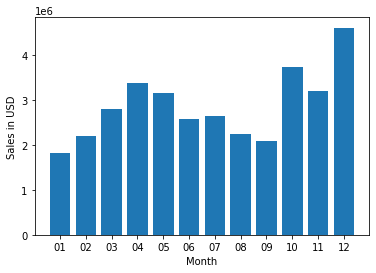

In [23]:
plt.bar(x=sales_by_month.index, height=sales_by_month)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show()

December is the best sales month of year.

Assumptions for this:
- Big discounts of year (e.g. Christmas, New Year, Black Friday, Cyber Monday, etc.).

#### 3.2. What city has the best sales? And assumptions. <a class="anchor" id="h3-3.2"></a>

Extract city from 'Purchase Address'

There are 3 ways:

In [24]:
df['Purchase Address'].str.split(",").str[1]

0                 Boston
1               Portland
2          San Francisco
3            Los Angeles
4                 Austin
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: Purchase Address, Length: 185950, dtype: object

In [25]:
df['Purchase Address'].str.split(",", expand=True)[1]

0                 Boston
1               Portland
2          San Francisco
3            Los Angeles
4                 Austin
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: 1, Length: 185950, dtype: object

In [26]:
get_city = lambda address: address.split(",")[1]
df['Purchase Address'].apply(get_city)

0                 Boston
1               Portland
2          San Francisco
3            Los Angeles
4                 Austin
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: Purchase Address, Length: 185950, dtype: object

Add "City" column to dataframe

In [27]:
df['City'] = df['Purchase Address'].apply(get_city)

In [28]:
sales_by_city = df.groupby('City').sum()['Sales']
sales_by_city

City
 Atlanta          2.795499e+06
 Austin           1.819582e+06
 Boston           3.661642e+06
 Dallas           2.767975e+06
 Los Angeles      5.452571e+06
 New York City    4.664317e+06
 Portland         2.320491e+06
 San Francisco    8.262204e+06
 Seattle          2.747755e+06
Name: Sales, dtype: float64

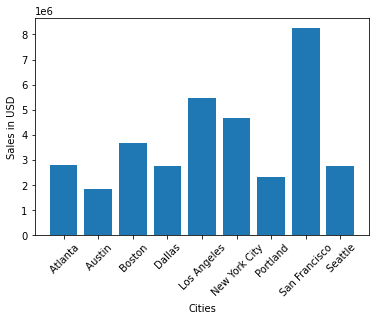

In [29]:
plt.bar(x=sales_by_city.index, height=sales_by_city)
plt.xticks(rotation=45)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

San Francisco is the best sales city of year.

Assumptions for this:

- Silicon Valley - a global center for high technology based in SF.
- The amount of engineers located in SF.

#### 3.3. What time should we display ads to maximize the likelihood of customer's buying product? <a class="anchor" id="h3-3.3"></a>

Convert data type of "Order Date" to datetimne & extract hour to "Hour" column.

In [30]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour

In [31]:
orders_by_hour = df.groupby('Hour').count()['Sales']
orders_by_hour

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Sales, dtype: int64

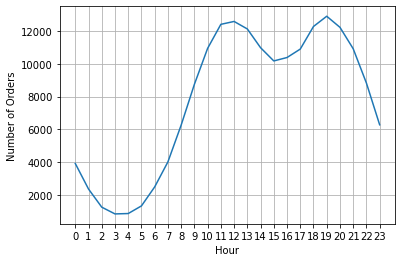

In [32]:
plt.plot(orders_by_hour.index, orders_by_hour, '-')
plt.grid()
plt.xticks(orders_by_hour.index)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

The most closed orders fall between the hours of 10 am to 12 am and 6 pm to 8 pm, lunchtime and dinner time respectively. So maybe we should display ads 30 minutes before these periods.

#### 3.4. What products are most often sold together? <a class="anchor" id="h3-3.4"></a>

Select the orders has >1 items

In [33]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",09,Atlanta,20
186803,259314,Wired Headphones,1,11.99,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,Atlanta,0
186804,259314,AAA Batteries (4-pack),2,2.99,5.98,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,Atlanta,0
186841,259350,Google Phone,1,600.00,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",09,San Francisco,13


Collect products with the same Order ID into a 'set'. We use 'set' instead of other collection data types for getting frequency table of products after.

There are a few ways to do it:

In [34]:
df_dup.groupby('Order ID').agg({'Product': set})

,Product
Order ID,
141275,"{USB-C Charging Cable, Wired Headphones}"
141290,"{AA Batteries (4-pack), Apple Airpods Headphones}"
141365,"{Vareebadd Phone, Wired Headphones}"
141384,"{Google Phone, USB-C Charging Cable}"
141450,"{Google Phone, Bose SoundSport Headphones}"
...,...
319536,"{Wired Headphones, Macbook Pro Laptop}"
319556,"{Google Phone, Wired Headphones}"
319584,"{iPhone, Wired Headphones}"


In [35]:
df_dup.groupby('Order ID')['Product'].apply(set)

Order ID
141275             {USB-C Charging Cable, Wired Headphones}
141290    {AA Batteries (4-pack), Apple Airpods Headphones}
141365                  {Vareebadd Phone, Wired Headphones}
141384                 {Google Phone, USB-C Charging Cable}
141450           {Google Phone, Bose SoundSport Headphones}
                                ...                        
319536               {Wired Headphones, Macbook Pro Laptop}
319556                     {Google Phone, Wired Headphones}
319584                           {iPhone, Wired Headphones}
319596                   {iPhone, Lightning Charging Cable}
319631    {Lightning Charging Cable, 34in Ultrawide Moni...
Name: Product, Length: 7136, dtype: object

List of 10 compound products that are often sold together

In [36]:
products_in_order = df_dup.groupby('Order ID')['Product'].apply(set)
# convert set back to list & join to string
products_in_order.apply(list).apply(', '.join).value_counts().head(10)

iPhone, Lightning Charging Cable                   895
Google Phone, USB-C Charging Cable                 869
iPhone, Wired Headphones                           374
Vareebadd Phone, USB-C Charging Cable              312
Google Phone, Wired Headphones                     311
iPhone, Apple Airpods Headphones                   299
Google Phone, Bose SoundSport Headphones           169
Vareebadd Phone, Wired Headphones                  110
AA Batteries (4-pack), Lightning Charging Cable    103
USB-C Charging Cable, Lightning Charging Cable      96
Name: Product, dtype: int64

#### 3.5. What product sold the most? And assumptions? <a class="anchor" id="h3-3.5"></a>

In [37]:
quantities_by_product = df.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending=False)
quantities_by_product

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32

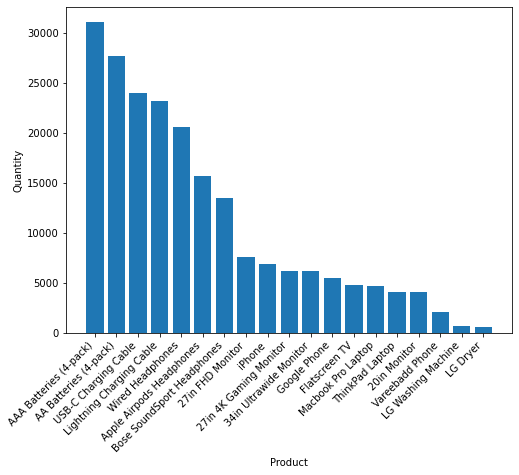

In [38]:
plt.subplots(figsize=(8,6))
plt.bar(x=quantities_by_product.index, height=quantities_by_product)
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.show()

Assumptions for the reasons of most sale product
- Price: the lower price products, the more it sells

In [39]:
x = df.groupby('Product').sum()['Quantity Ordered'].index
y1 = df.groupby('Product').sum()['Quantity Ordered']
y2 = df.groupby('Product').first()['Price Each']

In [40]:
df_products = pd.concat([y1,y2], axis=1).sort_values('Quantity Ordered', ascending=False)

Test price assumptions

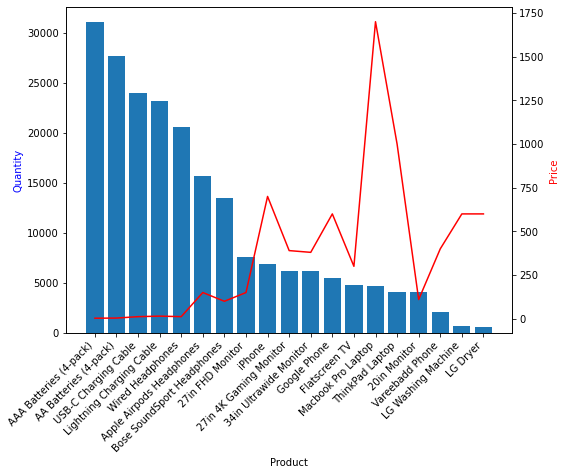

In [41]:
fig, ax1 = plt.subplots(figsize=(8,6))
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Product')

ax2 = ax1.twinx() # create a twinx axes ax2

ax1.bar(df_products.index, df_products['Quantity Ordered'], label="Quantity")
ax1.set_ylabel('Quantity', color='b')
ax2.plot(df_products.index, df_products['Price Each'], "r-")
ax2.set_ylabel('Price', color='r')

plt.show()

No big deal! Our price assumption obviously tend to be true.

Let's try looking at scatter view

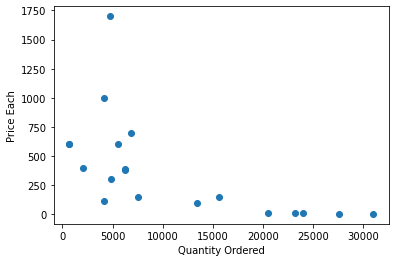

In [42]:
plt.scatter(df_products['Quantity Ordered'], df_products['Price Each'])
plt.xlabel('Quantity Ordered')
plt.ylabel('Price Each')
plt.show()

Notice that "Macbook Pro Laptop" is an outlier when it have highest price but a significant amount of sales. "20in Monitor" is sort of the opposite.